In [1]:
import os
import numpy as np
import ROOT

Welcome to JupyROOT 6.22/02


In [2]:
import root_numpy as rnp

In [3]:
import matplotlib.pyplot as plt

In [4]:
data_files = "../test_50files/"

In [5]:
fname_hits = os.path.join(data_files, 'Runs_2001_files_20200903_findhits.root')

In [6]:
fname_tracks = os.path.join(data_files, 'Runs_1893_files_20200903_vertexed.root')

In [7]:
fhits = ROOT.TFile(fname_hits)
ftracks = ROOT.TFile(fname_tracks)

In [8]:
graph_xz = ftracks.Get("xTrack")
X_xs = np.array(graph_xz.GetX())
Z_xs = np.array(graph_xz.GetY())

In [9]:
graph_yz = ftracks.Get("yTrack")
Y_ys = np.array(graph_yz.GetX())
Z_ys = np.array(graph_yz.GetY())

##### plot (X vs Z) for reco-hits

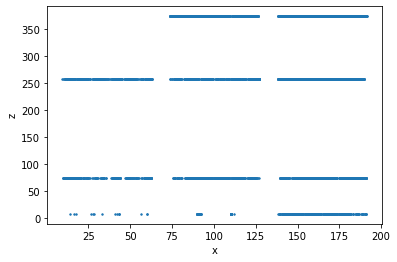

In [10]:
plt.scatter(X_xs, Z_xs, s=2)
plt.xlabel('x')
plt.ylabel('z')
plt.show()

##### plot Y vs Z for reco-hits

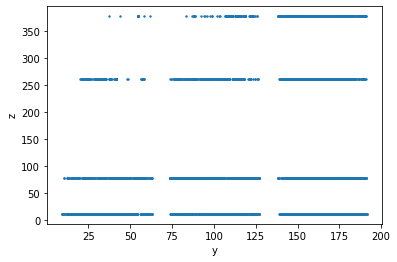

In [11]:
plt.scatter(Y_ys, Z_ys, s=2)
plt.xlabel('y')
plt.ylabel('z')
plt.show()

#### plot 'xTrack'

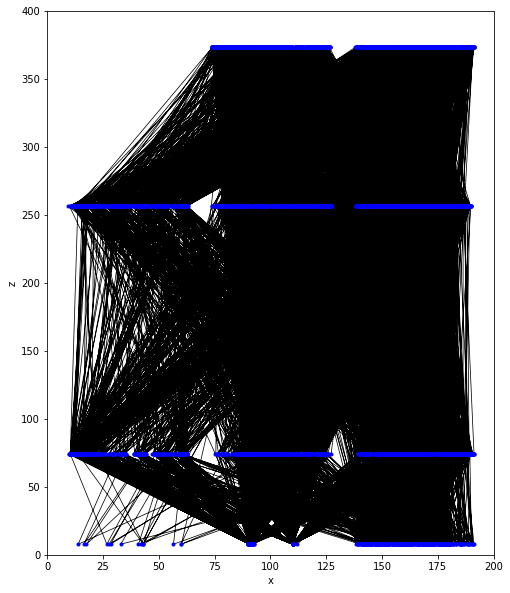

In [12]:
plt.figure(figsize=(8,10))
plt.plot(X_xs, Z_xs, '-o', linewidth=.75, markersize=3, markerfacecolor='blue', color='k', markeredgecolor='blue')
plt.xlim(0,200)
plt.ylim(0,400)
plt.xlabel('x')
plt.ylabel('z')
plt.show()

##### plot 'yTrack' 

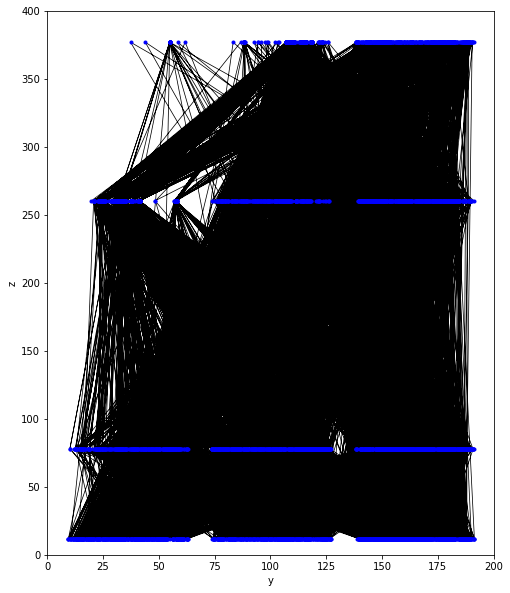

In [13]:
plt.figure(figsize=(8,10))
plt.plot(Y_ys, Z_ys, '-o', linewidth=.75, markersize=3, markerfacecolor='blue', color='k', markeredgecolor='blue')
plt.xlim(0,200)
plt.ylim(0,400)
plt.xlabel('y')
plt.ylabel('z')
plt.show()

In [14]:
def _custom_legend(ax):
    handles, labels = ax.get_legend_handles_labels()
    i = np.arange(len(labels))  # make an index for later
    filter = np.array([])  # set up a filter (empty for now)
    unique_labels = list(set(labels))  # find unique labels
    for ul in unique_labels:  # loop through unique labels
        filter = np.append(filter, [
            i[np.array(labels) == ul][0]])  # find the first instance of this label and add its index to the filter
    handles = [handles[int(f)] for f in
               filter]  # filter out legend items to keep only the first instance of each repeated label
    labels = [labels[int(f)] for f in filter]
    ax.legend(handles, labels, bbox_to_anchor=(0, 1.01, 1, 0.2), loc="lower left",
              mode="expand", borderaxespad=0, ncol=5, fancybox=True, shadow=True)
    return ax

##### Import globalhits as:
- globalhit0->y0
- globalhit1->x0
- globalhit2->y1
- globalhit3->x1
- globalhit4->y2
- globalhit5->x2
- globalhit6->y3
- globalhit7->x3

In [15]:
y0=rnp.root2array(fname_hits, treename="T", branches="globalhits.globalhit0")
x0=rnp.root2array(fname_hits, treename="T", branches="globalhits.globalhit1")

y1=rnp.root2array(fname_hits, treename="T", branches="globalhits.globalhit2")
x1=rnp.root2array(fname_hits, treename="T", branches="globalhits.globalhit3")

y2=rnp.root2array(fname_hits, treename="T", branches="globalhits.globalhit4")
x2=rnp.root2array(fname_hits, treename="T", branches="globalhits.globalhit5")

y3=rnp.root2array(fname_hits, treename="T", branches="globalhits.globalhit6")
x3=rnp.root2array(fname_hits, treename="T", branches="globalhits.globalhit7")

In [17]:
zx0= 373.5
zx1 = 256.5
zx2 = 74.1
zx3 = 7.8

In [18]:
zy0= 377.2
zy1= 260.5
zy2= 78.1,
zy3= 11.8

In [19]:
xs_hits =[x0,x1,x2,x3]
ys_hits = [y0, y1, y2, y3]
zxs_hits = [zx0, zx1, zx2, zx3]
zys_hits = [zy0, zy1, zy2, zy3]

##### plot Reco-hits and globalhits

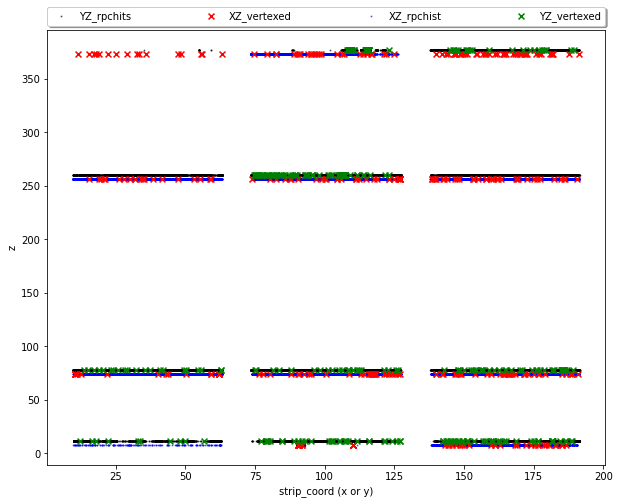

In [19]:
fig, ax = plt.subplots(figsize=(10,8))
for (x, y, zx, zy) in zip(xs_hits, ys_hits, zxs_hits, zys_hits):
    ax.scatter(x[np.logical_and(x>-1, y>-1)], 
                zx*np.ones(x[np.logical_and(x>-1, y>-1)].shape[0]), s=1, c='blue', alpha=0.5,
              label='XZ_rpchist')
    ax.scatter(y[np.logical_and(x>-1, y>-1)], 
                zy*np.ones(y[np.logical_and(x>-1, y>-1)].shape[0]), s=1, c='black', alpha=0.5,
              label='YZ_rpchits')

ax.scatter(X_xs, Z_xs,marker='x', s=35, c='red',
       label='XZ_vertexed')
ax.scatter(Y_ys, Z_ys, marker='x', 
        s=35, c='green',
       label='YZ_vertexed')
ax.set_xlabel('strip_coord (x or y)')
ax.set_ylabel('z')
_custom_legend(ax)
plt.show()

##### reco hits and globalhits: X vs Z

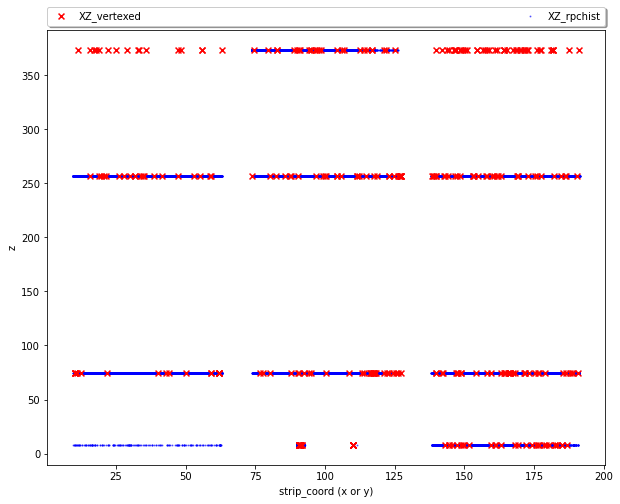

In [20]:
fig, ax = plt.subplots(figsize=(10,8))
for (x, y, zx, zy) in zip(xs_hits, ys_hits, zxs_hits, zys_hits):
    ax.scatter(x[np.logical_and(x>-1, y>-1)], 
                zx*np.ones(x[np.logical_and(x>-1, y>-1)].shape[0]), s=1, c='blue', alpha=0.5,
              label='XZ_rpchist')
ax.scatter(X_xs, Z_xs,marker='x', s=35, c='red',
       label='XZ_vertexed')
ax.set_xlabel('strip_coord (x or y)')
ax.set_ylabel('z')
_custom_legend(ax)
plt.show()

##### globalhits and reco-hits Y vs Z

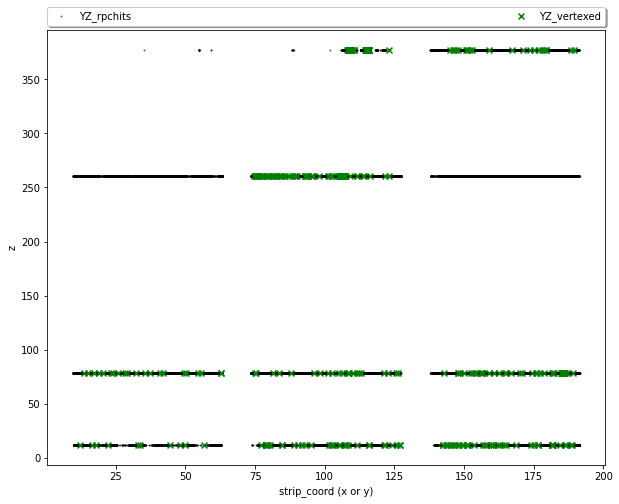

In [21]:
fig, ax = plt.subplots(figsize=(10,8))
for (x, y, zx, zy) in zip(xs_hits, ys_hits, zxs_hits, zys_hits):

    ax.scatter(y[np.logical_and(x>-1, y>-1)], 
                zy*np.ones(y[np.logical_and(x>-1, y>-1)].shape[0]), s=1, c='black', alpha=0.5,
              label='YZ_rpchits')


ax.scatter(Y_ys, Z_ys, marker='x', 
        s=35, c='green',
       label='YZ_vertexed')
ax.set_xlabel('strip_coord (x or y)')
ax.set_ylabel('z')
_custom_legend(ax)
plt.show()

##### Import globalhits as:
- globalhit0->y0
- globalhit1->y1
- globalhit2->y2
- globalhit3->y3
- globalhit4->x0
- globalhit5->x1
- globalhit6->x2
- globalhit7->x3

In [15]:
y0=rnp.root2array(fname_hits, treename="T", branches="globalhits.globalhit0")
y1=rnp.root2array(fname_hits, treename="T", branches="globalhits.globalhit1")

y2=rnp.root2array(fname_hits, treename="T", branches="globalhits.globalhit2")
y3=rnp.root2array(fname_hits, treename="T", branches="globalhits.globalhit3")

x0=rnp.root2array(fname_hits, treename="T", branches="globalhits.globalhit4")
x1=rnp.root2array(fname_hits, treename="T", branches="globalhits.globalhit5")

x2=rnp.root2array(fname_hits, treename="T", branches="globalhits.globalhit6")
x3=rnp.root2array(fname_hits, treename="T", branches="globalhits.globalhit7")

In [20]:
xs_hits =[x0,x1,x2,x3]
ys_hits = [y0, y1, y2, y3]
zxs_hits = [zx0, zx1, zx2, zx3]
zys_hits = [zy0, zy1, zy2, zy3]

##### plot global and reconstructed hits, X vs Z

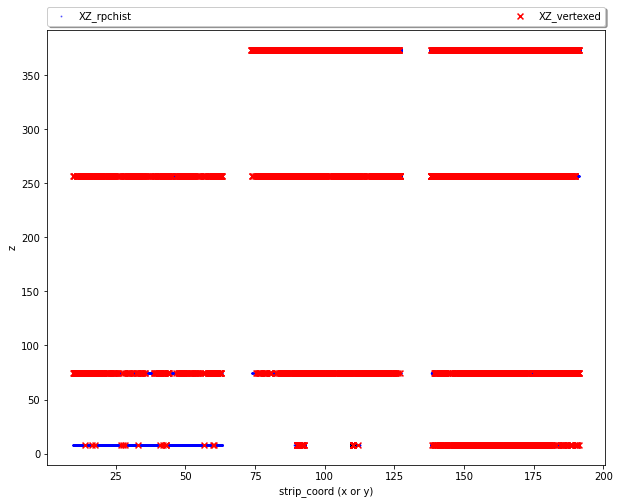

In [21]:
fig, ax = plt.subplots(figsize=(10,8))
for (x, y, zx, zy) in zip(xs_hits, ys_hits, zxs_hits, zys_hits):
    ax.scatter(x[np.logical_and(x>-1, y>-1)], 
                zx*np.ones(x[np.logical_and(x>-1, y>-1)].shape[0]), s=1, c='blue', alpha=0.5,
              label='XZ_rpchist')


ax.scatter(X_xs, Z_xs,marker='x', s=35, c='red',
       label='XZ_vertexed')

ax.set_xlabel('strip_coord (x or y)')
ax.set_ylabel('z')
_custom_legend(ax)
plt.show()

##### plot global and reconstructed hits, y vs z

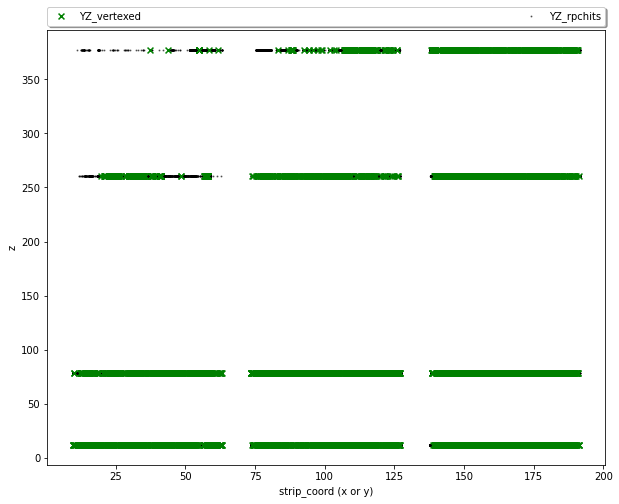

In [22]:
fig, ax = plt.subplots(figsize=(10,8))
for (x, y, zx, zy) in zip(xs_hits, ys_hits, zxs_hits, zys_hits):

    ax.scatter(y[np.logical_and(x>-1, y>-1)], 
                zy*np.ones(y[np.logical_and(x>-1, y>-1)].shape[0]), s=1, c='black', alpha=0.5,
              label='YZ_rpchits')

ax.scatter(Y_ys, Z_ys, marker='x', 
        s=35, c='green',
       label='YZ_vertexed')
ax.set_xlabel('strip_coord (x or y)')
ax.set_ylabel('z')
_custom_legend(ax)
plt.show()

<AxesSubplot:xlabel='strip_coord (x or y)', ylabel='z'>

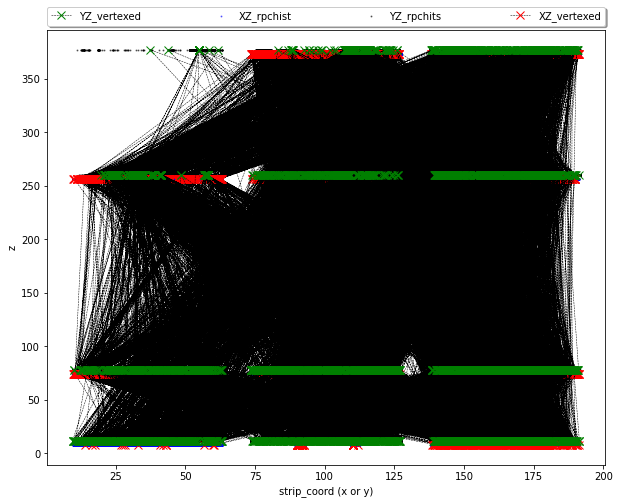

In [23]:
fig, ax = plt.subplots(figsize=(10,8))
for (x, y, zx, zy) in zip(xs_hits, ys_hits, zxs_hits, zys_hits):
    ax.scatter(x[np.logical_and(x>-1, y>-1)], 
                zx*np.ones(x[np.logical_and(x>-1, y>-1)].shape[0]), s=1, c='blue', alpha=0.5,
              label='XZ_rpchist')
    ax.scatter(y[np.logical_and(x>-1, y>-1)], 
                zy*np.ones(y[np.logical_and(x>-1, y>-1)].shape[0]), s=1, c='black', alpha=0.5,
              label='YZ_rpchits')

ax.plot(X_xs, Z_xs,'--x', linewidth=.5, 
        markersize=8, markerfacecolor='red', color='k', markeredgecolor='red',
       label='XZ_vertexed')
ax.plot(Y_ys, Z_ys, '--x',linewidth=.5, 
        markersize=8, markerfacecolor='green', color='k', markeredgecolor='green',
        label='YZ_vertexed')
ax.set_xlabel('strip_coord (x or y)')
ax.set_ylabel('z')
_custom_legend(ax)


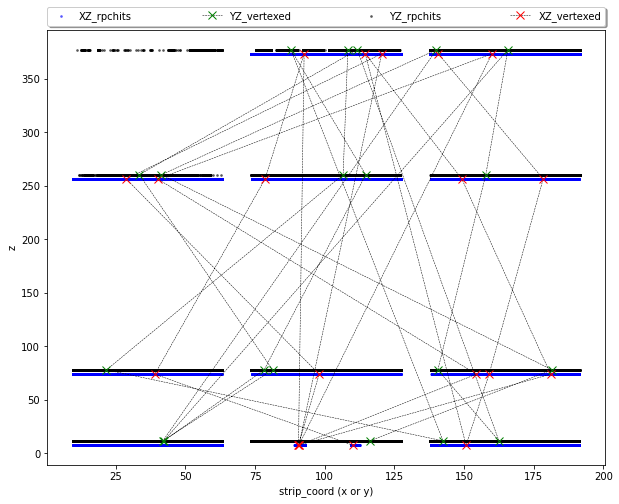

In [25]:
fig, ax = plt.subplots(figsize=(10,8))
for (x, y, zx, zy) in zip(xs_hits, ys_hits, zxs_hits, zys_hits):
    ax.scatter(x[np.logical_and(x>-1, y>-1)], 
                zx*np.ones(x[np.logical_and(x>-1, y>-1)].shape[0]), s=3, c='blue', alpha=0.5,
               label='XZ_rpchits')
    ax.scatter(y[np.logical_and(x>-1, y>-1)], 
                zy*np.ones(y[np.logical_and(x>-1, y>-1)].shape[0]), s=3, c='black', alpha=0.5,
               label='YZ_rpchits')

ax.plot(X_xs[:20], Z_xs[:20],'--x', linewidth=.5, 
        markersize=8, markerfacecolor='red', color='k', markeredgecolor='red',
       label='XZ_vertexed')
ax.plot(Y_ys[:20], Z_ys[:20], '--x',linewidth=.5, 
        markersize=8, markerfacecolor='green', color='k', markeredgecolor='green',
       label='YZ_vertexed')
ax.set_xlabel('strip_coord (x or y)')
ax.set_ylabel('z')
_custom_legend(ax)
plt.show()

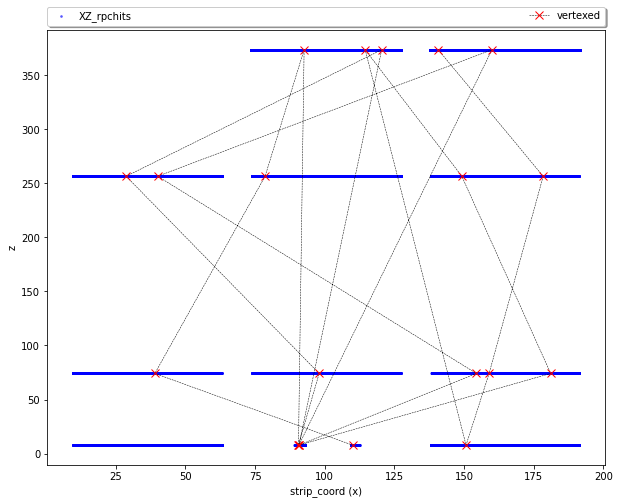

In [26]:
fig, ax = plt.subplots(figsize=(10,8))
for (x, y, zx, zy) in zip(xs_hits, ys_hits, zxs_hits, zys_hits):
    ax.scatter(x[np.logical_and(x>-1, y>-1)], 
                zx*np.ones(x[np.logical_and(x>-1, y>-1)].shape[0]), s=3, c='blue', alpha=0.5,
               label='XZ_rpchits')

ax.plot(X_xs[:20], Z_xs[:20],'--x', linewidth=.5, 
         markersize=8, markerfacecolor='red', color='k', markeredgecolor='red',
        label='vertexed')
ax.set_xlabel('strip_coord (x)')
ax.set_ylabel('z')
_custom_legend(ax)
plt.show()

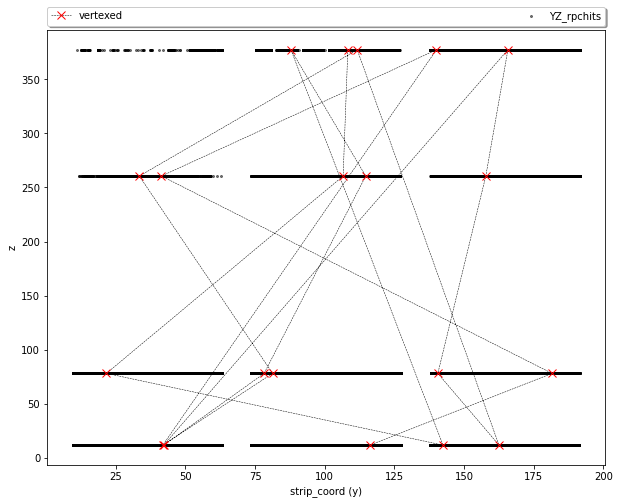

In [27]:
fig, ax = plt.subplots(figsize=(10,8))
for (x, y, zx, zy) in zip(xs_hits, ys_hits, zxs_hits, zys_hits):
    ax.scatter(y[np.logical_and(x>-1, y>-1)], 
                zy*np.ones(y[np.logical_and(x>-1, y>-1)].shape[0]), s=4, c='black', alpha=0.5,
               label='YZ_rpchits')
ax.plot(Y_ys[:20], Z_ys[:20], '--x',linewidth=.5, 
        markersize=8, markerfacecolor='red', color='k', markeredgecolor='red',
       label='vertexed')
ax.set_xlabel('strip_coord (y)')
ax.set_ylabel('z')
_custom_legend(ax)
plt.show()